In [1]:
import cv2
import numpy as np
import os
import csv
import glob

# Parent folder path containing the digit and alphabet folders
parent_folder_path = "C:/Users/Rumana/Desktop/HandWritten_Kannada/captured_images"

# Define the labels for digits and alphabets
digit_labels = list(range(10))
alphabet_labels = ['a', 'aaa', 'e', 'eee', 'u', 'uuu', 'ru', 'ye', 'yeee', 'ai', 'o', 'ooo', 'oww', 'am', 'aha','ka','kha','ga','gha','1_nya','ca','cha','ja','jha','2_nya','ta','ttha','dda','ddha','nna','tha','thaa','da','dha','na','pa','pha','ba','bha','ma','ya','ra','la','va','shea','sa','ha','laa']


# Define the header for the CSV file
header = ["label"]
for i in range(0, 784):
    header.append("pixel" + str(i))

with open('kannada_full_data.csv', 'a') as f:
    writer = csv.writer(f)
    writer.writerow(header)

# Load the captured images and preprocess them
train_x = []
train_y = []

# Process digits and alphabets
for label in digit_labels + alphabet_labels:
    dirList = glob.glob(os.path.join(parent_folder_path, str(label), "*.png"))

    for img_path in dirList:
        im = cv2.imread(img_path)
        im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        im_gray = cv2.GaussianBlur(im_gray, (15, 15), 0)
        roi = cv2.resize(im_gray, (28, 28), interpolation=cv2.INTER_AREA)

        data = []
        data.append(label)

        # Flatten the image data
        flattened_image = roi.flatten() / 255.0
        data.extend(flattened_image)

        train_x.append(flattened_image)
        train_y.append(label)

        with open('kannada_full_data.csv', 'a') as f:
            writer = csv.writer(f)
            writer.writerow(data)

# Convert the lists to numpy arrays
train_x = np.array(train_x)
train_y = np.array(train_y)

# Save the training dataset as numpy arrays
np.save("C:/Users/Rumana/Desktop/HandWritten_Kannada/captured_images/train_X.npy", train_x)
np.save("C:/Users/Rumana/Desktop/HandWritten_Kannada/captured_images/train_Y.npy", train_y)


In [2]:
import pandas as pd
from sklearn.utils import shuffle
data  =pd.read_csv('kannada_full_data.csv',dtype=str)
# Identify duplicates
duplicates = data[data.duplicated()]

# Remove duplicates
data = data.drop_duplicates()

# Shuffle the dataset
data = shuffle(data)

data=shuffle(data)
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
1676,ru,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1964,ai,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3345,jha,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2743,ga,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2660,kha,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4534,pa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4528,pa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4260,da,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
import numpy as np

X = data.drop(["label"],axis=1)
Y = data["label"]

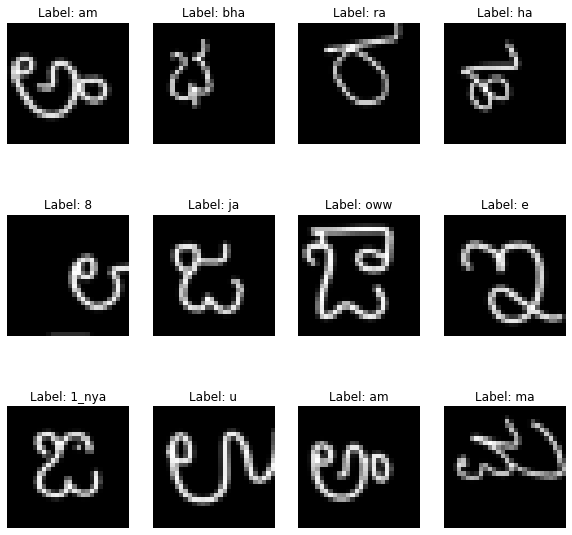

In [4]:
import matplotlib.pyplot as plt

def display_shuffled_images(images, labels, rows, cols):
    # Combine images and labels into a single array for shuffling
    combined_data = list(zip(images, labels))
    np.random.shuffle(combined_data)
    
    # Unpack the shuffled data
    shuffled_images, shuffled_labels = zip(*combined_data)

    fig, axes = plt.subplots(rows, cols, figsize=(10, 10))

    for i in range(rows):
        for j in range(cols):
            idx = i * cols + j
            img = shuffled_images[idx].reshape(28, 28).astype(float)  # Convert to float
            label = shuffled_labels[idx]

            axes[i, j].imshow(img, cmap='gray')
            axes[i, j].set_title(f"Label: {label}")
            axes[i, j].axis('off')

    plt.show()

# Specify the number of rows and columns for the grid
num_rows = 3
num_cols = 4

# Assuming X is a DataFrame containing image data and Y is a Series containing labels
# You can adapt this based on your specific data structure
# Display a shuffled set of images from your dataset
display_shuffled_images(X.values, Y, num_rows, num_cols)


In [5]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
# Load the training dataset
train_x = np.load("C:/Users/Rumana/Desktop/HandWritten_Kannada/captured_images/train_X.npy")
train_y = np.load("C:/Users/Rumana/Desktop/HandWritten_Kannada/captured_images/train_Y.npy")

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.1, random_state=42)


# support vector classifier

In [6]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', random_state=6)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=6)

In [7]:
import joblib

joblib.dump(svm_model,"model/svm(digits+a-laa)")

['model/svm(digits+a-laa)']

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib

# Load the trained SVC model
svc_model = joblib.load("model/svm(digits+a-laa)")

# Assuming X_test_imputed and test_y are correctly loaded and preprocessed
predictions = svc_model.predict(X_test)

# Evaluate metrics
accuracy = accuracy_score(y_test, predictions) * 100
precision = precision_score(y_test, predictions, average='weighted') * 100
recall = recall_score(y_test, predictions, average='weighted') * 100
f1 = f1_score(y_test, predictions, average='weighted') * 100

# Print the metrics
print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1 Score: {f1:.2f}%")

Accuracy: 72.98%
Precision: 73.36%
Recall: 72.98%
F1 Score: 72.38%


# K-nearest Neighbors

In [9]:
from sklearn.neighbors import KNeighborsClassifier
import joblib

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

joblib.dump(knn,"model/knn(digits+a-laa)")

['model/knn(digits+a-laa)']

In [10]:
knn_model = joblib.load("model/knn(digits+a-laa)")

# Assuming X_test_imputed and test_y are correctly loaded and preprocessed
predictions = knn_model.predict(X_test)

# Evaluate metrics
accuracy = accuracy_score(y_test, predictions) * 100
precision = precision_score(y_test, predictions, average='weighted') * 100
recall = recall_score(y_test, predictions, average='weighted') * 100
f1 = f1_score(y_test, predictions, average='weighted') * 100

# Print the metrics
print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1 Score: {f1:.2f}%")

Accuracy: 70.05%
Precision: 74.83%
Recall: 70.05%
F1 Score: 71.12%


# CNN

In [11]:
# pip install --upgrade tensorflow
#!pip install --upgrade protobuf


#!pip install tensorflow==2.7.0


In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models

label_encoder = LabelEncoder()
train_y = label_encoder.fit_transform(train_y)

X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.1, random_state=42)

# Reshape the data for CNN input
X_train = X_train.reshape((-1, 28, 28, 1))
X_test = X_test.reshape((-1, 28, 28, 1))

# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=80, batch_size=32, validation_split=0.1)


Epoch 1/80
148/148 [==============================] - 4s 22ms/step - loss: 3.2270 - accuracy: 0.1930 - val_loss: 2.0973 - val_accuracy: 0.4149
Epoch 2/80
148/148 [==============================] - 3s 22ms/step - loss: 1.3907 - accuracy: 0.6066 - val_loss: 1.1077 - val_accuracy: 0.6864
Epoch 3/80
148/148 [==============================] - 3s 22ms/step - loss: 0.8872 - accuracy: 0.7352 - val_loss: 0.8508 - val_accuracy: 0.7247
Epoch 4/80
148/148 [==============================] - 3s 17ms/step - loss: 0.6476 - accuracy: 0.8045 - val_loss: 0.7641 - val_accuracy: 0.7820
Epoch 5/80
148/148 [==============================] - 2s 17ms/step - loss: 0.4872 - accuracy: 0.8519 - val_loss: 0.6077 - val_accuracy: 0.8011
Epoch 6/80
148/148 [==============================] - 2s 17ms/step - loss: 0.4049 - accuracy: 0.8718 - val_loss: 0.5883 - val_accuracy: 0.8126
Epoch 7/80
148/148 [==============================] - 2s 16ms/step - loss: 0.3242 - accuracy: 0.8973 - val_loss: 0.5471 - val_accuracy: 0.8451

Epoch 58/80
148/148 [==============================] - 3s 20ms/step - loss: 0.0034 - accuracy: 0.9987 - val_loss: 0.5946 - val_accuracy: 0.9025
Epoch 59/80
148/148 [==============================] - 3s 19ms/step - loss: 0.0023 - accuracy: 0.9991 - val_loss: 0.6020 - val_accuracy: 0.9044
Epoch 60/80
148/148 [==============================] - 3s 18ms/step - loss: 0.0032 - accuracy: 0.9987 - val_loss: 0.5857 - val_accuracy: 0.9025
Epoch 61/80
148/148 [==============================] - 3s 20ms/step - loss: 0.0027 - accuracy: 0.9989 - val_loss: 0.6195 - val_accuracy: 0.8929
Epoch 62/80
148/148 [==============================] - 3s 20ms/step - loss: 0.0030 - accuracy: 0.9989 - val_loss: 0.6142 - val_accuracy: 0.9006
Epoch 63/80
148/148 [==============================] - 3s 18ms/step - loss: 0.0027 - accuracy: 0.9989 - val_loss: 0.6131 - val_accuracy: 0.9025
Epoch 64/80
148/148 [==============================] - 3s 22ms/step - loss: 0.0027 - accuracy: 0.9989 - val_loss: 0.6306 - val_accuracy:

In [13]:
#pip install --upgrade tensorflow

In [14]:
#pip install protobuf==3.20.0

In [15]:
model.save('model/cnn(digits+a-laa).h5')

In [16]:
from tensorflow.keras.models import load_model

cnn_model=load_model("model/cnn(digits+a-laa).h5")

y_pred_probs = cnn_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate evaluation metrics
accuracy_cnn = accuracy_score(np.argmax(y_test, axis=1), y_pred) * 100
precision_cnn = precision_score(np.argmax(y_test, axis=1), y_pred, average='weighted', zero_division=1)*100
recall_cnn = recall_score(np.argmax(y_test, axis=1), y_pred, average='weighted')*100
f1_cnn = f1_score(np.argmax(y_test, axis=1), y_pred, average='weighted')*100

# Display the results
print("Convolutional Neural Network (CNN):")
print("Accuracy: {:.2f}%".format(accuracy_cnn))
print("Precision: {:.2f}".format(precision_cnn))
print("Recall: {:.2f}".format(recall_cnn))
print("F1-score: {:.2f}".format(f1_cnn))

19/19 [==============================] - 0s 6ms/step
Convolutional Neural Network (CNN):
Accuracy: 88.47%
Precision: 89.57
Recall: 88.47
F1-score: 88.59


In [17]:
import joblib
import cv2
import numpy as np
import time
import pyscreenshot as ImageGrab
from tensorflow.keras.models import load_model


model = load_model("model/cnn(digits+a-laa).h5")  # Update with the correct path to your Kannada digit and alphabet recognition model

images_folder = "img/"

character_actual = None  # Variable to store the actual digit or alphabet drawn by the user

while True:
    img = ImageGrab.grab(bbox=(60, 170, 400, 500))  # Adjust the coordinates to capture the appropriate region

    img.save(images_folder + "img.png")
    im = cv2.imread(images_folder + "img.png")
    im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    im_gray = cv2.GaussianBlur(im_gray, (15, 15), 0)

    # Threshold the image
    ret, im_th = cv2.threshold(im_gray, 100, 255, cv2.THRESH_BINARY)
    roi = cv2.resize(im_th, (28, 28), interpolation=cv2.INTER_AREA)

    rows, cols = roi.shape

    X = []

    # Add pixel one by one into the data array
    for i in range(rows):
        for j in range(cols):
            k = roi[i, j]
            if k > 100:
                k = 1
            else:
                k = 0
            X.append(k)

    X = np.array(X)  # Convert X to a NumPy array
    if not any(X):
        character = "noCharVisible"
    else:
        prediction = model.predict(X.reshape(1, 28, 28, 1))
        predicted_class_index = np.argmax(prediction)  # Find the index of the maximum value

    # Inverse transform the predicted class index to get the corresponding label
        character = label_encoder.inverse_transform([predicted_class_index])[0]

    # Draw prediction and accuracy on the image
    cv2.putText(im, "Prediction: " + str(character), (20, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2, cv2.LINE_AA)

    cv2.startWindowThread()
    cv2.namedWindow("Result")
    cv2.imshow("Result", im)

    # Wait for user input to set the actual digit or alphabet
    key = cv2.waitKey(1)
    if key == 27:  # If ESC key is pressed, exit the loop
        break

cv2.destroyAllWindows()


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 20ms/step
